# VGG16 필터 살펴보기

In [1]:
from tensorflow.keras.applications import VGG16

In [6]:
vgg = VGG16(include_top = False, # fully connected layer가 안 쌓인다.
            weights = 'imagenet')  # 이미지넷에서 학습했던 가중치이다.

In [7]:
vgg.summary() # 

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [8]:
block_conv1 = vgg.get_layer('block1_conv1')

In [9]:
block_conv1.input

<tf.Tensor 'input_3:0' shape=(None, None, None, 3) dtype=float32>

In [10]:
filters, bias = block_conv1.get_weights()

In [11]:
filters.shape

(3, 3, 3, 64)

In [12]:
filters[:, :, :, 0].shape

(3, 3, 3)

In [13]:
import matplotlib.pyplot as plt
plt.imshow(filters[:, :, :, 0], cmap = 'gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [14]:
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

In [15]:
fliters2 = normalize(filters)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


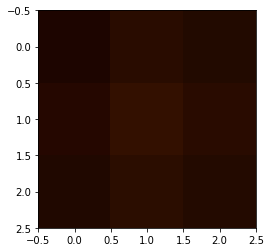

In [16]:
plt.imshow(filters[:, :, :, 1], cmap= 'gray')

이런 필터들이 학습된 것이다. 앞에 있을 수록 간단한 필터를 뽑는다. (레이어 기준)
노말라이즈 시킨 이유는 보여줄 때, 빨리 보여주기 위해서. 노말라이즈 안하면 이미지가 늦게 뜬다. 학숩된 필터는 이런 식으로 볼 수 있는 것이다.

https://transcranial.github.io/keras-js/#/mnist-cnn

In [17]:
block_conv1.output

<tf.Tensor 'block1_conv1_2/Identity:0' shape=(None, None, None, 64) dtype=float32>

In [18]:
block_conv1.input

<tf.Tensor 'input_3:0' shape=(None, None, None, 3) dtype=float32>

In [19]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
import numpy as np

In [20]:
vgg.layers[2]

In [21]:
vgg = VGG16()
model = Model(inputs = vgg.inputs,
              outputs = vgg.layers[2].output) # layer[2] 라고 하면 hierachy 구조라서, 처음부터 layer[2]까지 다 나온다.
model.summary() # 여기서 224, 224로 나왔으므로, 타겟사이즈를 맞출 수 있다.

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


In [23]:
img = load_img('C:/aaa.png',
               target_size=(224, 224)) # 사이즈까지 바꿀 수 있다.

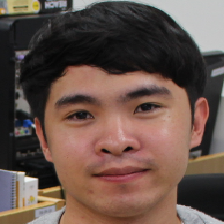

In [24]:
img # PIL 형태니까 바로 보인다.
# 원래 새 이미지를 가져왔어야 했는데...

In [25]:
img = img_to_array(img) # 넘파이로 바꿔주는 거다.
img.shape

(224, 224, 3)

In [26]:
img = np.expand_dims(img, axis = 0)

In [21]:
img.shape
# input_8 (InputLayer)         [(None, 224, 224, 3)]  에 맞처주려고 차원 늘려준 것이다.

(1, 224, 224, 3)

In [27]:
img = preprocess_input(img)
feature_maps = model.predict(img)

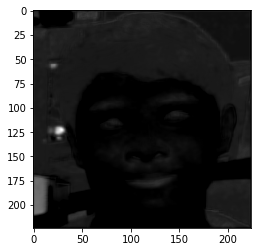

In [28]:
a = feature_maps.reshape(224, 224, 64)
plt.imshow(a[:, :, 2], cmap = 'gray') # 개무섭네 진짜
# 필터를 거치고 이미지가 어떻게 변하는지 알 수 있다.
# 거의 직선적인 특성들을 뽑았다.

 - 이렇게 뽑아낸 특징을 가지고 나중에 다른데 활용할 것이다.
 - 레이어가 깊어질 수록 우리가 이해하지 못하는 추상화된 특징을 가지고 있을 것이다.
 - 직접 모델만 만들면, 학습된 결과를 이런 식으로 확인할 수 있다.

# 트랜스퍼 러닝

https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub

앤드류 웅이 트랜스퍼 러닝이 미래의 기술이라고 언급함. 하나 모델을 다 모아둔 것 -> model zoo 텐서플로는 tensorflow hub!

https://tfhub.dev/

### 갖다쓰는데 핵심

구조가 똑같아야 한다. shape해서 보면 된다. 텐서플로 허브는 웨이트 뿐만 아니라 모델 전체를 다 가져올 수 있다.

 - 케라스 어플리케이션: 모델이 10개밖에 안되지만, 쓰기 편하다. 레이어별로 쪼갤 수 있다.
 - 텐서허브: 많은 모델이 있지만, 모델을 통째로 가져올 수 밖에 없다.

In [29]:
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [25]:
# !pip install -U tensorflow-hub # 이렇게 U를 써주면, 이전 버전 지우고 최신 버전을 설치해준다. 좋은 테크닉.

In [30]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" #@param {type:"string"}

In [32]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, # 코딩을 편하게 해줌
                   input_shape=IMAGE_SHAPE+(3,)) # keras 처음 레이어는 인풋shape 맞춰줘야 함.
                   # 3채널이고, 채널라스트를 나타낸다.
])

In [33]:
(224, 224) + (3, ) # 튜플에서 더하기는 extend를 나타냄.

(224, 224, 3)

In [34]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


In [30]:
classifier2 = tf.keras.Sequential([
   tf.keras.layers.Dense(15, input_dim = 3)
]) # 이렇게 input dim이 되긴 하나, 애매하기 때문에 사용하지 않을 것을 권장한다.

In [35]:
classifier.layers

In [36]:
classifier.inputs

[<tf.Tensor 'keras_layer_1_input:0' shape=(None, 224, 224, 3) dtype=float32>]

In [37]:
classifier.outputs # 1001개... flatten 되어 있다.

[<tf.Tensor 'keras_layer_1/Identity:0' shape=(None, 1001) dtype=float32>]

In [38]:
classifier.get_weights

<bound method Model.get_weights of <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000246B5D30DC8>>

### 이미지 불러오기

In [39]:
from tensorflow.keras.preprocessing.image import load_img

grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')

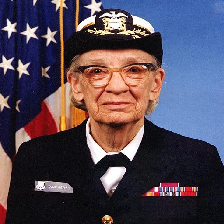

In [43]:
grace_hopper = load_img(grace_hopper, target_size=IMAGE_SHAPE)
grace_hopper

In [44]:
grace_hopper = np.array(grace_hopper) / 255.0

In [38]:
grace_hopper.shape

(224, 224, 3)

In [45]:
result = classifier.predict(grace_hopper[np.newaxis, ...])
result.shape

(1, 1001)

In [47]:
dir(result) # 텐서 함수에 넣었으므로 텐서로 나와야 하는데, 이건 그냥 넘파이다.
type(result)

numpy.ndarray

In [50]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

In [52]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

653

In [53]:
imagenet_labels[653]

'military uniform'

In [44]:
np.argmax(result, axis = -1)
np.argmax(np.argmax(result, axis = -1))

0

꽃 데이터를 추가해서, 꽃 데이터도 학습이 되게 할 수 있다.

In [54]:
data_root = tf.keras.utils.get_file(
  'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)

In [55]:
data_root

'C:\\Users\\white\\.keras\\datasets\\flower_photos'

In [56]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SHAPE)

Found 3670 images belonging to 5 classes.


In [48]:
# dir(image_data)

In [57]:
for image_batch, label_batch in image_data:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 5)


In [58]:
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

### Download the headless model

In [59]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" #@param {type:"string"}

In [68]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224,224,3)) # 텐서허브는 인클루드 탑 옵션이 없네..

In [69]:
classifier = tf.keras.Sequential([
feature_extractor_layer
])

In [70]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 1280)              2257984   
Total params: 2,257,984
Trainable params: 0
Non-trainable params: 2,257,984
_________________________________________________________________


In [72]:
feature_extractor_layer.output

<tf.Tensor 'keras_layer_3/Identity:0' shape=(None, 1280) dtype=float32>

In [73]:
rst = classifier.predict(img)
rst.shape

(1, 1280)

In [66]:
rst

array([[0.13709225, 0.10814213, 0.09246029, ..., 1.1896093 , 0.40499717,
        0.        ]], dtype=float32)

이 자식은 예측해주는 애가 없다. include_top 옵션의 차이이다. fully connected를 추가할 수 있다. transter learning의 기초는 이렇게 fully connected 맘대로 다루는 것부터 시작한다.

In [58]:
'trainable' in dir(feature_extractor_layer) # 학습이 안되게 하는 옵션.

True

In [59]:
feature_extractor_layer.trainable = False # ★★★★아주 중요. 나중에 물어볼각.

headless에서 head는 예측하는 레이어를 말한다.

In [74]:
image_data.num_classes

5

In [75]:
model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Conv2D(32, (3, 3), activation = 'relu'), # 아 내가 잘못한게 아니었어!
    layers.Dense(image_data.num_classes, activation='softmax')
        
])

model.summary()

ValueError: Input 0 of layer conv2d is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: [None, 1280]

Dense는 붙는데, 컨볼루션은 안붙는다.

In [76]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

In [64]:
steps_per_epoch = np.ceil(image_data.samples/image_data.batch_size)

history = model.fit_generator(image_data, epochs=2,
                              steps_per_epoch=steps_per_epoch)

Epoch 1/2
115/115 [==============================] - 39s 339ms/step - loss: 0.6514 - acc: 0.7665
Epoch 2/2
115/115 [==============================] - 34s 293ms/step - loss: 0.3300 - acc: 0.8886


In [66]:
history.history

{'loss': [0.6513377103558678, 0.3301518401755299],
 'acc': [0.76648504, 0.8885559]}

위의 방법으로 꽃을 예측했더니, 거의 90퍼 가까운 성능이 나온다.

근데 이 방식은 별로다. 케라스에도 있다.

텐서허브는 통째로 가져오지만, 케라스 모바일넷은 쪼개서가져올 수 있다. 그래서 유연하게 바꿀 수 있다.

In [74]:
from tensorflow.keras.applications import mobilenet

 - 트랜스퍼 러닝은 비슷하면 비슷할수록, 어느정도 성능이 보장된다.
 - 데이터가 많이 확보될수록, 어느정도 성능이 보장된다.
 
small data, similar -> pretrained network...

 - feature extraction: Dense 레이어만 추가시키는 것. 데이터가 작고, 원래 데이터셋하고 비슷할 때. 그러니 웨이트 학습시킬 필요가 없다. 데이터가 작으니까 Dese는 그대로 있어야 한다. 분류할 때, 예전 지식이 조금 더 추가됨. trainable = False 쓰면 된다.
 - fine tuning: 조금씩 뭘 고친다. 데이터셋이 아주 많은데, 나하고 비슷할 경우 맨 끝의 weight를 바꾼다. 이 자식은 마지막의 CNN데이터까지 같이 학습시킨다. 왜냐? 데이터가 많으니까.
 
 https://keras.io/applications/#applications
 
텐서허브는 통째로 가져오니까, 파인튜닝이 안된다. (현재로서는)

파인 튜닝 전략은 다 케라스에서 쓸 것이다. 그런데 케라스는 쓸 수 있는 모델이 10개밖에 없다. 그래서 다 장단점이 있는 것이다.